# Python libraries

In [1]:
#Libralies
import statistics
from scipy import stats
from scipy.stats import sem
from scipy.stats import ttest_ind_from_stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math 
from matplotlib import pyplot as plt
import warnings 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from tabulate import tabulate

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')#ignoring warnings

# Question 2.3

In [2]:
titanic_Data=pd.read_csv("titanic3.csv") #Reading Titanic dataset
titanic_Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
selected_data=titanic_Data[['pclass','sex','age']] #extract pclass, sex, and age columns 
selected_data

,pclass,sex,age
0,1,female,29.00
1,1,male,0.92
2,1,female,2.00
3,1,male,30.00
4,1,female,25.00
...,...,...,...
1304,3,female,14.50
1305,3,female,NaN
1306,3,male,26.50
1307,3,male,27.00


In [4]:
#creating an instance of label encoder
lab= LabelEncoder()
#compute label encoding on sex column
selected_data['sex'] = lab.fit_transform(selected_data['sex'])# transform categorical feature(sex) to numerical 
selected_data

,pclass,sex,age
0,1,0,29.00
1,1,1,0.92
2,1,0,2.00
3,1,1,30.00
4,1,0,25.00
...,...,...,...
1304,3,0,14.50
1305,3,0,NaN
1306,3,1,26.50
1307,3,1,27.00


In [5]:
selected_data['age'] = selected_data['age'].fillna(selected_data['age'].mean()) #impute missing values using mean
selected_data

,pclass,sex,age
0,1,0,29.000000
1,1,1,0.920000
2,1,0,2.000000
3,1,1,30.000000
4,1,0,25.000000
...,...,...,...
1304,3,0,14.500000
1305,3,0,29.881138
1306,3,1,26.500000
1307,3,1,27.000000


In [6]:
Y_titanic=titanic_Data['survived']
Y_titanic

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [7]:
#https://www.datacamp.com/tutorial/decision-tree-classification-python

classf = DecisionTreeClassifier() #creating decision tree classifier
classf = classf.fit(selected_data,Y_titanic) # train decion tree classifier

In [8]:
classf

DecisionTreeClassifier()

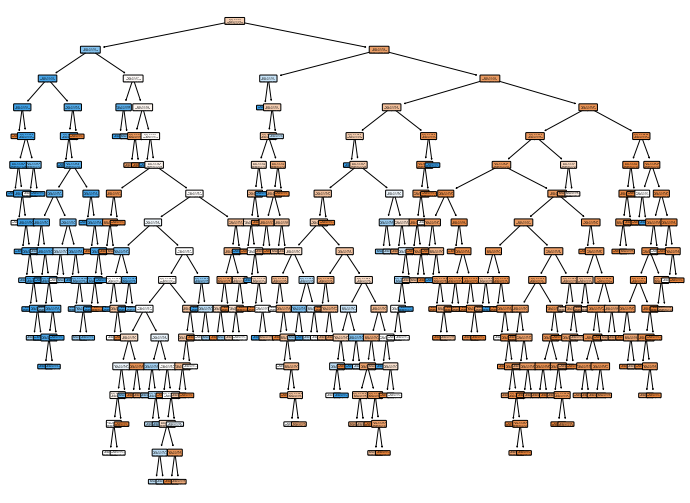

In [9]:
plt.figure(figsize=(12,9)) # size of the figure
plot_tree(classf, filled=True,rounded=True,fontsize=2)
plt.show()

#Evaluation before pruning

In [10]:
#https://www.w3schools.com/python/python_ml_cross_validation.asp
k_f = KFold(n_splits = 10, shuffle=True, random_state=0) 
Scores = cross_val_score(classf, selected_data, Y_titanic, cv = k_f, scoring='accuracy')
print(f'The accuracy scores:{Scores.mean()}')
misclassfErrors=(1-Scores.mean())
print(f'The misclassfication errors:{misclassfErrors}')

The accuracy scores:0.7731238990017615
The misclassfication errors:0.22687610099823852


Our model is performing well at 77

# pruning

In [11]:
l=[]
list_of_maxdepth= range(1, 30)
for i in list_of_maxdepth:  
    classf1 = DecisionTreeClassifier(max_depth=i) #creating decision tree classifier
    classf1 = classf1.fit(selected_data,Y_titanic) # train decion tree classifier
    Scores1 = cross_val_score(classf1, selected_data, Y_titanic, cv = k_f, scoring='accuracy').mean()
    l.append(Scores1)
best_max_depth=list_of_maxdepth[l.index(np.max(l))]
print("best_max_depth: ",best_max_depth)

best_max_depth:  3


In [12]:

classf_pruned = DecisionTreeClassifier(max_depth=best_max_depth) #creating decision tree classifier
classf_pruned = classf_pruned.fit(selected_data,Y_titanic) #train decion tree classifier


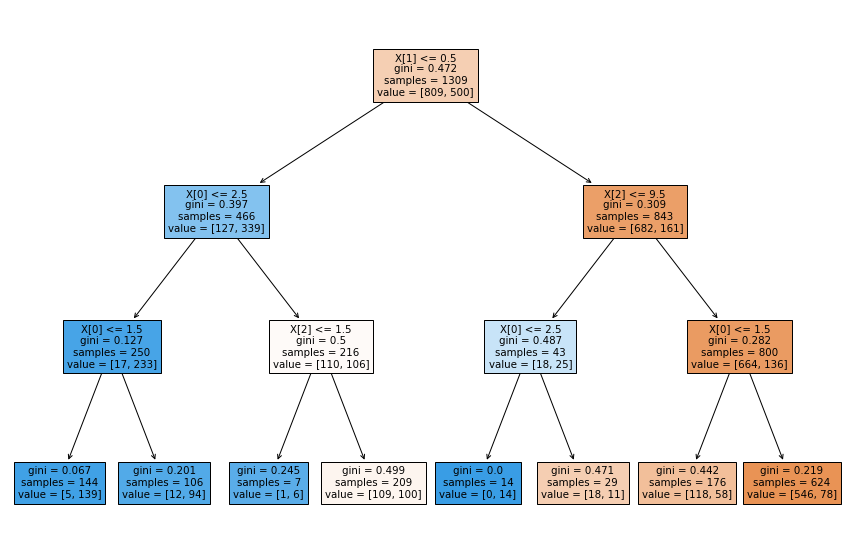

In [13]:
plt.figure(figsize=(15,10)) # size of the figure
plot_tree(classf_pruned, filled=True)
plt.show()

In [14]:
k_f = KFold(n_splits = 10, shuffle=True, random_state=0) 
Scores2 = cross_val_score(classf_pruned, selected_data, Y_titanic, cv = k_f, scoring='accuracy')
print(f'The accuracy scores:{Scores2.mean()}')
misclassfErrors2=(1-Scores2.mean())
print(f'The misclassfication errors:{misclassfErrors2}')

The accuracy scores:0.7868408690546095
The misclassfication errors:0.21315913094539052


Logistic  regression model

In [15]:
# instantiate the model (using the default parameters)
logistic_reg1 = LogisticRegression()
# fitting the model with data

logistic_reg1=logistic_reg1.fit(selected_data,Y_titanic )
# logistic_reg1

In [16]:
k_f = KFold(n_splits = 10, shuffle=True, random_state=0) 
Scores3 = cross_val_score(logistic_reg1, selected_data, Y_titanic, cv = k_f, scoring='accuracy')
print(f'The accuracy scores:{Scores3.mean()}')
misclassfErrors3=(1-Scores3.mean())
print(f'The misclassfication errors:{misclassfErrors3}')

The accuracy scores:0.7883852025836758
The misclassfication errors:0.21161479741632416


Based on the Accuracy obtained, the best model is the logistic regression model which has an accuracy of 78.88% 

and misclassification errors of 21.16% 

# Question3.2

How I transformed the available variables
steps:
   
    -Changing categorical into numerical values 
    - rescalling
    - normilization
    - filling null
    - label encoding
    
    for my case, i did
    
    -Label encoding: I changed female and male into numerical values (1 and 0)
    -Fill null: age column was replaced with average ages
    
    

# 3.3

In [17]:
# #https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

# KNN_model= KNeighborsClassifier(n_neighbors=3)

# KNN_model.fit(selected_data,Y_titanic) #train the model 

# predicted= KNN_model.predict(selected_data) #Predict the output
# print(predicted)


In [18]:
#choose k between 1 to 20
k_f = KFold(n_splits = 10, shuffle=True, random_state=0) 
k_range = range(1, 20)
k_scores_error = []

#use iteration to caclulator different k in models
for k in k_range:
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    model_knn=KNN_model.fit(selected_data,Y_titanic)
    scores = cross_val_score(model_knn,selected_data , Y_titanic, cv=k_f, scoring='neg_mean_squared_error')
    k_scores_error.append(abs(scores.mean()))
best_k=k_range[k_scores_error.index(np.min(k_scores_error))]
minimum_loss = k_scores_error[best_k-1]
optimal_k = k_range[k_scores_error.index(minimum_loss)]
print(f'The optimal number of the neighbors is: {optimal_k}')# display the output


The optimal number of the neighbors is: 3


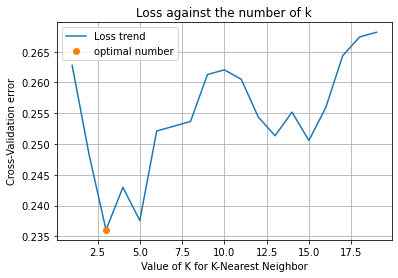

In [19]:
#plot to see clearly
plt.plot(k_range, k_scores_error,label="Loss trend")
plt.xlabel('Value of K for K-Nearest Neighbor')
plt.plot(best_k,minimum_loss,'o',label="optimal number")
plt.ylabel('Cross-Validation error')
plt.title("Loss against the number of k")
plt.grid()
plt.legend()
plt.show()

         

The above graph represented The loss vs number of k, where k=3 is indicate the minimum squared error.  

In [20]:
#KNN_model = KNeighborsClassifier(n_neighbors=3)
#scores = cross_val_score(KNN_model,selected_data , Y_titanic, cv=5, scoring='accuracy')
#k_scores.append(scores.mean())

# 3.4

Evaluate the performance using different distance metrics.

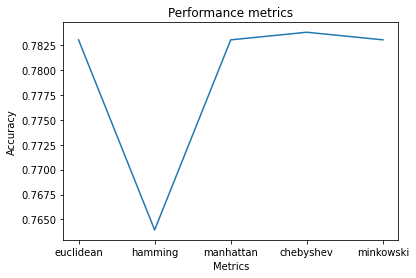

In [21]:
scaler=StandardScaler()
h=scaler.fit_transform(selected_data)
score=[]
metric=['euclidean','hamming','manhattan','chebyshev','minkowski']
for kk in metric:
    KNN_model = KNeighborsClassifier(n_neighbors=3, metric=kk)
    model_knn=KNN_model.fit(h,Y_titanic)
    scores = cross_val_score(KNN_model,h , Y_titanic, cv=k_f, scoring='accuracy')
    score.append(scores.mean())
    
plt.plot(metric,score)
plt.title("Performance metrics")
plt.ylabel('Accuracy')
plt.xlabel('Metrics')
plt.show() 


In [22]:
pd.Series(score, index=metric)

euclidean    0.783030
hamming      0.763946
manhattan    0.783030
chebyshev    0.783793
minkowski    0.783030
dtype: float64

According to the above graph, Hamming has a very low accuracy of ( 0.763946)  whereas, chebyshev has high accuracy of (0.783793).

Other metrics have medium accuracy.

# 3.5

In [23]:
KNN_model1 = KNeighborsClassifier(n_neighbors=3, metric='chebyshev')
scores1= cross_val_score(KNN_model1, selected_data , Y_titanic, cv=5, scoring='accuracy').mean()
scores1
    
print(f'The accuracy of the KNN model is:{scores1}')
print(f'The misclassification error is:{1-scores1}')

The accuracy of the KNN model is:0.6134626071188325
The misclassification error is:0.3865373928811675


# Logistic model

In [24]:

logistic_reg11 = LogisticRegression(solver='liblinear')
logistic_reg11=logistic_reg1.fit(selected_data,Y_titanic )

k_f = KFold(n_splits = 10, shuffle=True, random_state=0) 
Scores33 = cross_val_score(logistic_reg11, selected_data, Y_titanic, cv = k_f, scoring='accuracy')
print(f'The accuracy scores:{Scores33.mean()}')
misclassfErrors33=(1-Scores33.mean())
print(f'The misclassfication errors:{misclassfErrors33}')

The accuracy scores:0.7883852025836758
The misclassfication errors:0.21161479741632416


The logistic regression model is the best model based on the accuracy and misclassification error.

it has an accuracy of 78% (0.7883852025836758) and misclassification error of 21% (0.21161479741632416)

# Question 4.1

In [25]:
winequality_red=pd.read_csv("winequality-red.csv", delimiter=";") #Reading winequality red dataset
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
winequality_white=pd.read_csv("winequality-white.csv", delimiter=";") #Reading winequality white dataset
winequality_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [38]:
Mean_wineQRed = winequality_red.drop('quality',axis=1).mean()
Mean_wineQWhite = winequality_white.drop('quality',axis=1).mean()
Mean_wineQWhite.index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [37]:
Mean_wineQRed.index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

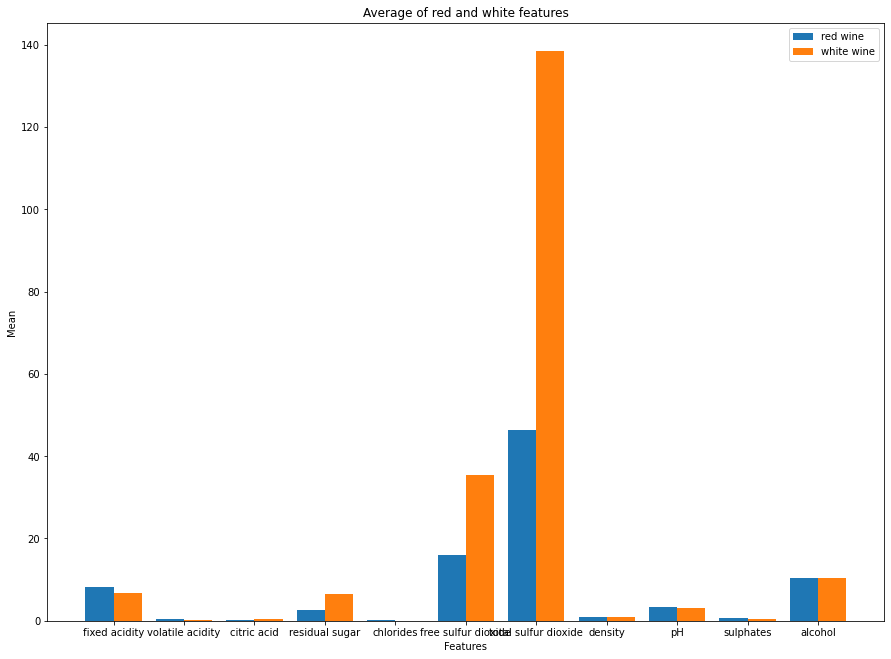

In [83]:
'''
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
'''
plt.figure(figsize=(15,11)) # size of the figure
X =Mean_wineQRed.index
X_axis = np.arange(len(X)) 
plt.bar(X_axis - 0.2, Mean_wineQRed , 0.4, label = 'red wine')
plt.bar(X_axis + 0.2, Mean_wineQWhite, 0.4, label = 'white wine')
plt.xticks(X_axis, X)
plt.xlabel("Features")
plt.ylabel("Mean")
plt.title("Average of red and white features")
plt.legend()
plt.show()

based on the graph, white wine has the better quality than red wine

In [43]:
Mean_wineQWhite

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64

In [41]:
Mean_wineQRed

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64

In [44]:
WineQRed = winequality_red.drop('quality',axis=1)
QualityRed=  winequality_red['quality']

In [45]:
WineQWhite = winequality_white.drop('quality',axis=1)
QualityWhite= winequality_white['quality']

# 4.2

In [74]:
correlation_coef=WineQRed.corrwith(QualityRed) 
print(f'The correlation coefficient for red wine quality:')
correlation_coef

The correlation coefficient for red wine quality:


fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
dtype: float64

In [75]:
correlation_coef1=WineQWhite.corrwith(QualityWhite) 
print(f'The correlation coefficient for white wine quality:')
correlation_coef1

The correlation coefficient for white wine quality:


fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
dtype: float64

alcohol is the most relevant because it has high correlation with quality

# 4.3

#Red wine

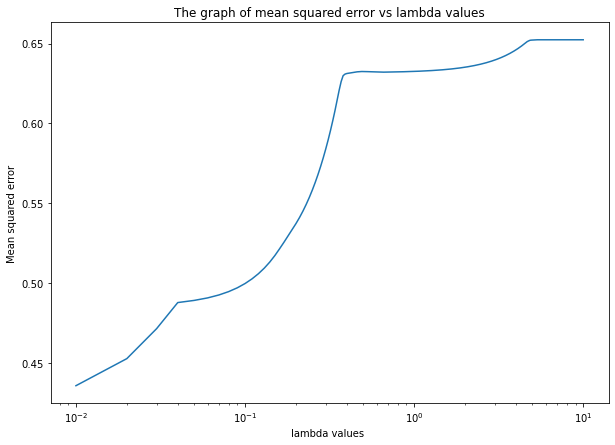

In [58]:
l1=[]
l1e=[]
list_of_maxdepth= np.arange(0.01, 10, 0.01)
for i in list_of_maxdepth:  
    LM = Lasso(alpha=i) #creating 
    LM = LM.fit(WineQRed,QualityRed) # train lASSO
    ScoresL = abs(cross_val_score(LM, WineQRed ,QualityRed, cv = k_f, scoring='neg_mean_squared_error').mean())
    l1.append(ScoresL)
    coef=LM.coef_
    l1e.append(coef)
plt.figure(figsize=(10,7)) # size of the figure
plt.xlabel("lambda values ")
plt.ylabel("Mean squared error")
plt.title("The graph of mean squared error vs lambda values")
plt.semilogx(list_of_maxdepth,l1)
plt.show()

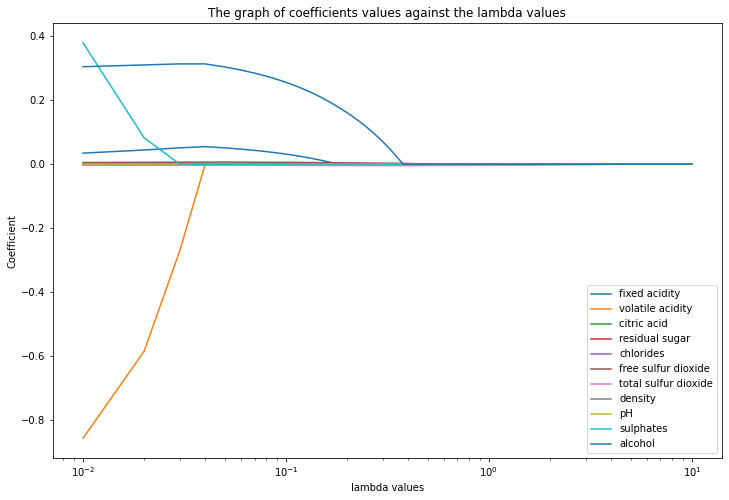

In [56]:
plt.figure(figsize=(12,8)) # size of the figure
plt.semilogx(list_of_maxdepth, l1e)
plt.xlabel("lambda values")
plt.ylabel("Coefficient")
plt.title("The graph of coefficients values against the lambda values")
plt.legend(WineQRed.columns)
plt.show()

based on the above figure, as the lambda values increases the features will be penalised till when all the parameter estimates will be zero. 

#White wine

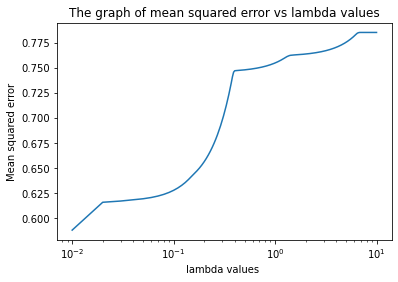

In [90]:
l11=[]
l11e=[]
list_of_maxdepth1= np.arange(0.01, 10, 0.01)
for i in list_of_maxdepth1:  
    LM1 = Lasso(alpha=i) #creating 
    LM1 = LM1.fit(WineQWhite,QualityWhite) # train lASSO
    ScoresL1 = abs(cross_val_score(LM1, WineQWhite ,QualityWhite, cv = k_f, scoring='neg_mean_squared_error').mean())
    l11.append(ScoresL1)
    coef=LM1.coef_
    l11e.append(coef)
#plt.figure(figsize=(12,68)) # size of the figure
plt.semilogx(list_of_maxdepth1,l11)
plt.xlabel("lambda values ")
plt.ylabel("Mean squared error")
plt.title("The graph of mean squared error vs lambda values")
plt.show()

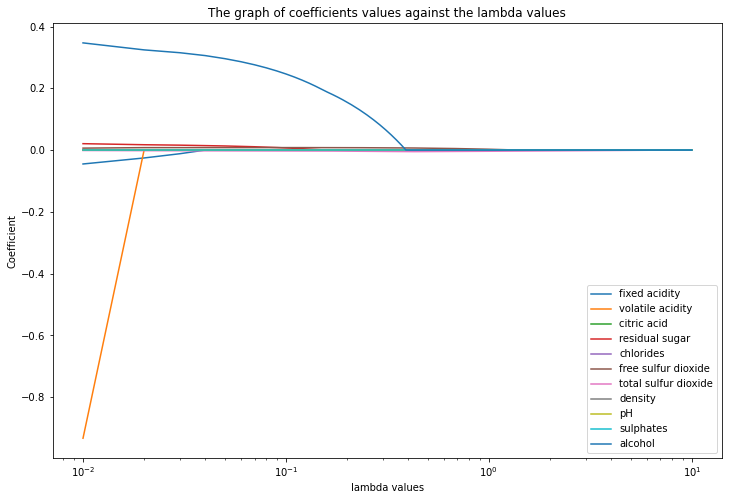

In [86]:
plt.figure(figsize=(12,8)) # size of the figure
plt.semilogx(list_of_maxdepth, l11e)
plt.legend(WineQRed.columns)
plt.xlabel("lambda values")
plt.ylabel("Coefficient")
plt.title("The graph of coefficients values against the lambda values")
plt.show()

In [78]:
LassoM = Lasso(alpha=0.01) #creating 
LassoM = LassoM.fit(WineQRed,QualityRed) #train lASSO
coef1=LassoM.coef_
param=LassoM.feature_names_in_
listCoef=list(zip(param, coef1))
listCoef

[('fixed acidity', 0.03447914030187799),
 ('volatile acidity', -0.8564562880418891),
 ('citric acid', 0.0),
 ('residual sugar', 0.0),
 ('chlorides', -0.0),
 ('free sulfur dioxide', 0.005089901210329606),
 ('total sulfur dioxide', -0.0031077512882979694),
 ('density', -0.0),
 ('pH', -0.0),
 ('sulphates', 0.37903426677244856),
 ('alcohol', 0.304490276505546)]

The selected predictors are those with values which is different from zero.

# 4.4

In [59]:
S_predict=WineQRed[['fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']]
S_predict

,fixed acidity,volatile acidity,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,11.0,34.0,0.56,9.4
1,7.8,0.880,25.0,67.0,0.68,9.8
2,7.8,0.760,15.0,54.0,0.65,9.8
3,11.2,0.280,17.0,60.0,0.58,9.8
4,7.4,0.700,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...
1594,6.2,0.600,32.0,44.0,0.58,10.5
1595,5.9,0.550,39.0,51.0,0.76,11.2
1596,6.3,0.510,29.0,40.0,0.75,11.0
1597,5.9,0.645,32.0,44.0,0.71,10.2


In [60]:
#define parameter range 
par_grid = {'n_neighbors': np.arange(1,31)}  
 
nghbr1 = KNeighborsRegressor()

grid = GridSearchCV(nghbr1, par_grid) 
   
#fitting the model for grid search 
grid.fit(S_predict, QualityRed)
# print best parameter
print(grid.best_params_) 

{'n_neighbors': 18}


# 4.5

In [66]:
nghbr2 = KNeighborsRegressor(n_neighbors=18)
nghbr2=nghbr2.fit(S_predict, QualityRed)
ScoresList1 = abs(cross_val_score(nghbr2, S_predict, QualityRed, cv = k_f, scoring='neg_mean_squared_error').mean())
print(f'The mean squared error(MSE) is: {ScoresList1}')

The mean squared error(MSE) is: 0.545135710264772


In [67]:
ScoresList1 = abs(cross_val_score(nghbr2, S_predict, QualityRed, cv = k_f, scoring='r2').mean())
print(f'The R_squared is: {ScoresList1}')

The R_squared is: 0.1613461227108658


In [69]:
#Making an OLS model
x1=sm.add_constant(S_predict)
regressor_OLS = sm.OLS(QualityRed,x1).fit() #fitting the variables in the OLS model
print(regressor_OLS.summary()) #summary of the history

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          9.15e-144
Time:                        20:08:06   Log-Likelihood:                -1585.2
No. Observations:                1599   AIC:                             3184.
Df Residuals:                    1592   BIC:                             3222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5383 

In [65]:
ypredicted =regressor_OLS.predict(x1)
ypredicted

0       5.063337
1       5.032702
2       5.143007
3       5.711838
4       5.063337
          ...   
1594    5.551085
1595    5.940546
1596    5.918179
1597    5.491124
1598    6.021059
Length: 1599, dtype: float64

In [80]:
mdl = LinearRegression().fit(S_predict, QualityRed) # Linear Regression Model
ypredicted=mdl.predict(S_predict)
print(f'{ypredicted}')

[5.06333701 5.03270192 5.14300699 ... 5.91817931 5.49112395 6.02105912]


In [70]:
print(f'The MSE of Linear Model is:{mean_squared_error(QualityRed, ypredicted)}')

The MSE of Linear Model is:0.4252352692407322


In [71]:
print(f'The R_sqaured of the linear model is:{regressor_OLS.rsquared}')

The R_sqaured of the linear model is:0.3475590446897766
